# Stock & Revenue Analysis – Day 1

Reference:
IBM Hands-on Lab: Analyzing Historical Stock/Revenue Data and Building a Dashboard

Goal:
- Load historical stock price data
- Inspect and clean the data
- Answer basic analytical questions


# Stock Price Analysis (AAPL)

This notebook analyzes historical stock price data using Python, SQL, and visualization.
The workflow follows a standard data science pipeline: data loading, inspection, cleaning,
SQL-based analysis, and visualization.


In [4]:
!pip install pandas yfinance


## 1. Data Loading

Historical stock price data for AAPL was loaded using the Yahoo Finance API.
The dataset includes daily open, high, low, close, adjusted close, and volume values.


In [6]:
import pandas as pd
import yfinance as yf


In [5]:
import pandas as pd
import yfinance as yf
print("Environment ready")


Environment ready


In [7]:
ticker = "AAPL"
df = yf.download(ticker, period="1y", auto_adjust=False)


[*********************100%***********************]  1 of 1 completed


## 2. Data Inspection

The dataset was inspected to understand its structure, data types, and distribution of values.
Initial checks were performed to verify data completeness and suitability for analysis.


In [8]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-01-23,222.653000,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,221.776962,222.779999,225.630005,221.410004,224.779999,54697900
2025-01-27,228.825089,229.860001,232.149994,223.979996,224.020004,94863400
2025-01-28,237.187256,238.259995,240.190002,230.809998,230.850006,75707600
2025-01-29,238.282303,239.360001,239.860001,234.009995,234.119995,45486100


In [9]:
df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 251 entries, 2025-01-23 to 2026-01-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [10]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,233.113806,233.517808,236.044980,230.925657,233.344701,5.386509e+07
std,27.259315,27.080936,26.861721,27.314665,27.206632,2.321770e+07
min,171.832413,172.419998,190.339996,169.210007,171.949997,1.791060e+07
25%,209.573761,210.080002,212.185005,207.930000,210.050003,4.066035e+07
50%,231.365707,231.589996,233.380005,228.270004,230.850006,4.749050e+07
75%,257.325546,257.574997,258.985001,255.239998,256.914993,5.593145e+07
max,286.190002,286.190002,288.619995,283.299988,286.200012,1.843959e+08


In [16]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

## 3. Data Cleaning

The date index was converted into a column to make the dataset compatible with SQL-based
queries and time-based aggregation. A preview of the cleaned dataset was reviewed to
confirm that the transformation was applied correctly.


In [11]:
df = df.reset_index()


In [35]:
# 1) Flatten MultiIndex columns if they exist
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join([str(x) for x in col if x not in (None, '')]).strip() for col in df.columns]

# 2) Normalize names
df.columns = [c.lower().replace(" ", "_") for c in df.columns]

# 3) Write back to SQL (replace old table)
df.to_sql("stock_prices", conn, if_exists="replace", index=False)

# 4) Confirm schema
pd.read_sql("PRAGMA table_info(stock_prices);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,date,TIMESTAMP,0,None,0
1,1,adj_close_aapl,REAL,0,None,0
2,2,close_aapl,REAL,0,None,0
3,3,high_aapl,REAL,0,None,0
4,4,low_aapl,REAL,0,None,0
5,5,open_aapl,REAL,0,None,0
6,6,volume_aapl,INTEGER,0,None,0


## 4. SQL Table Creation

The cleaned dataset was stored in a SQLite database to enable SQL-based querying,
aggregation, and trend analysis.


In [24]:
import sqlite3

conn = sqlite3.connect("stocks.db")


In [22]:
df.to_sql("stock_prices", conn, if_exists="replace", index=False)


251

In [23]:
pd.read_sql("SELECT COUNT(*) FROM stock_prices", conn)


,COUNT(*)
0,251


In [25]:
pd.read_sql("SELECT COUNT(*) FROM stock_prices", conn)


,COUNT(*)
0,251


In [30]:
pd.read_sql("PRAGMA table_info(stock_prices);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,"('Date', '')",TIMESTAMP,0,None,0
1,1,"('Adj Close', 'AAPL')",REAL,0,None,0
2,2,"('Close', 'AAPL')",REAL,0,None,0
3,3,"('High', 'AAPL')",REAL,0,None,0
4,4,"('Low', 'AAPL')",REAL,0,None,0
5,5,"('Open', 'AAPL')",REAL,0,None,0
6,6,"('Volume', 'AAPL')",INTEGER,0,None,0


## 5. SQL Exploration

SQL queries were used to explore the structure and contents of the stock_prices table,
including basic aggregations and validation of numeric fields, before performing
time-based analysis.


In [32]:
pd.read_sql("""
SELECT AVG("Close") AS avg_close_price
FROM stock_prices
""", conn)


,avg_close_price
0,0.0


In [34]:
pd.read_sql('SELECT AVG("Adj Close") AS avg_close_price FROM stock_prices;', conn)


,avg_close_price
0,0.0


In [40]:
pd.read_sql('SELECT AVG("Close") AS avg_close_price FROM stock_prices;', conn)


,avg_close_price
0,0.0


In [37]:
schema = pd.read_sql("PRAGMA table_info(stock_prices);", conn)
schema["name"].tolist()


['date',
 'adj_close_aapl',
 'close_aapl',
 'high_aapl',
 'low_aapl',
 'open_aapl',
 'volume_aapl']

In [41]:
pd.read_sql('SELECT AVG("Adj Close") AS avg_close_price FROM stock_prices;', conn)


,avg_close_price
0,0.0


In [42]:
pd.read_sql("""
SELECT AVG(close_aapl) AS avg_close_price
FROM stock_prices
""", conn)


,avg_close_price
0,233.517808


In [43]:
pd.read_sql("""
SELECT AVG(adj_close_aapl) AS avg_adj_close_price
FROM stock_prices
""", conn)


,avg_adj_close_price
0,233.113806


In [44]:
pd.read_sql("""
SELECT strftime('%Y-%m', date) AS month,
       AVG(close_aapl) AS avg_close
FROM stock_prices
GROUP BY month
ORDER BY month
""", conn)


,month,avg_close
0,2025-01,232.501428
1,2025-02,238.513684
2,2025-03,222.702858
3,2025-04,201.183811
4,2025-05,203.947143
5,2025-06,200.657000
6,2025-07,211.280909
7,2025-08,224.647142
8,2025-09,242.486190
9,2025-10,258.295216


In [46]:
monthly_df = pd.read_sql("""
SELECT strftime('%Y-%m', date) AS month,
       AVG(close_aapl) AS avg_close
FROM stock_prices
GROUP BY month
ORDER BY month
""", conn)
monthly_df

,month,avg_close
0,2025-01,232.501428
1,2025-02,238.513684
2,2025-03,222.702858
3,2025-04,201.183811
4,2025-05,203.947143
5,2025-06,200.657000
6,2025-07,211.280909
7,2025-08,224.647142
8,2025-09,242.486190
9,2025-10,258.295216


In [47]:
monthly_df["month"] = pd.to_datetime(monthly_df["month"])


In [48]:
monthly_df.dtypes


month        datetime64[us]
avg_close           float64
dtype: object

In [50]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 132.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.5 MB/s eta 0:00:00


In [52]:
import matplotlib.pyplot as plt


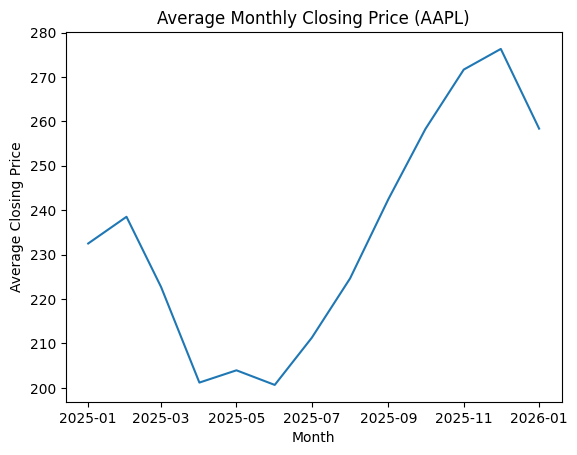

In [53]:
plt.figure()
plt.plot(monthly_df["month"], monthly_df["avg_close"])
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Average Monthly Closing Price (AAPL)")
plt.show()


In [58]:
compare_df = pd.read_sql("""
SELECT strftime('%Y-%m', date) AS month,
       AVG(close_aapl) AS avg_close,
       AVG(adj_close_aapl) AS avg_adj_close
FROM stock_prices
GROUP BY month
ORDER BY month
""", conn)

compare_df


,month,avg_close,avg_adj_close
0,2025-01,232.501428,231.454616
1,2025-02,238.513684,237.634378
2,2025-03,222.702858,221.943917
3,2025-04,201.183811,200.498205
4,2025-05,203.947143,203.431011
5,2025-06,200.657000,200.235423
6,2025-07,211.280909,210.837013
7,2025-08,224.647142,224.361021
8,2025-09,242.486190,242.251352
9,2025-10,258.295216,258.045067


In [59]:
compare_df["month"] = pd.to_datetime(compare_df["month"])


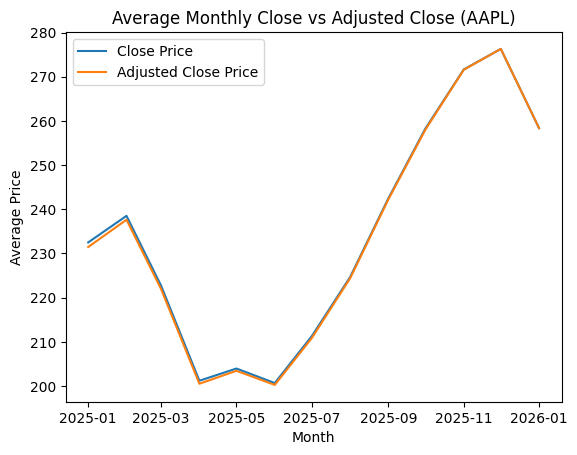

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(compare_df["month"], compare_df["avg_close"], label="Close Price")
plt.plot(compare_df["month"], compare_df["avg_adj_close"], label="Adjusted Close Price")

plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Monthly Close vs Adjusted Close (AAPL)")
plt.legend()
plt.show()


### Insight – Close vs Adjusted Close
- The adjusted close price accounts for corporate actions such as dividends and stock splits.
- Small differences between close and adjusted close highlight why adjusted prices are preferred for long-term trend analysis.


## Volume Analysis

This section examines trading volume trends over time to identify periods of increased market activity.


In [61]:
volume_df = pd.read_sql("""
SELECT 
    strftime('%Y-%m', date) AS month,
    AVG(volume_aapl) AS avg_volume
FROM stock_prices
GROUP BY month
ORDER BY month
""", conn)

volume_df["month"] = pd.to_datetime(volume_df["month"])
volume_df


,month,avg_volume
0,2025-01-01,6.965827e+07
1,2025-02-01,4.538275e+07
2,2025-03-01,5.310664e+07
3,2025-04-01,7.653898e+07
4,2025-05-01,5.693944e+07
5,2025-06-01,5.502046e+07
6,2025-07-01,4.908798e+07
7,2025-08-01,5.800377e+07
8,2025-09-01,6.026364e+07
9,2025-10-01,4.770183e+07


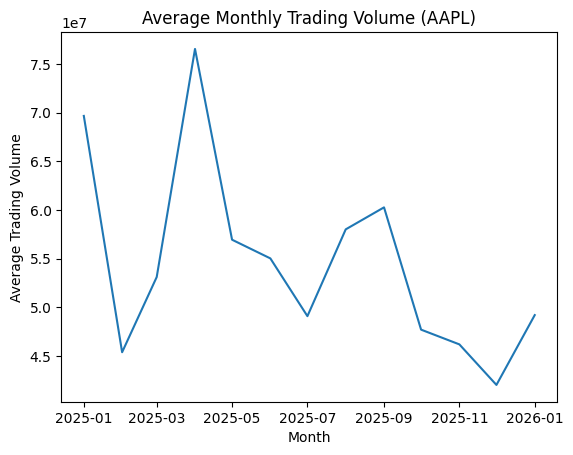

In [62]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(volume_df["month"], volume_df["avg_volume"])
plt.xlabel("Month")
plt.ylabel("Average Trading Volume")
plt.title("Average Monthly Trading Volume (AAPL)")
plt.show()


### Volume Insights

- Trading volume varies significantly across months.
- Higher volume often coincides with increased market activity and investor interest.
- Volume analysis complements price trends by providing context on market participation.


## 7. Summary

In this analysis, historical AAPL stock price data was loaded using the Yahoo Finance API,
cleaned, and stored in a SQLite database for SQL-based analysis. The data was inspected
and prepared to ensure consistency and usability.

SQL queries were used to explore the dataset and compute monthly average prices.
Visualizations highlighted overall price trends as well as differences between close
and adjusted close prices. The comparison demonstrated why adjusted close prices are
preferred for long-term performance analysis, as they account for dividends and stock splits.
